# Project: ML - Logistic Regression, Binary Classification (University Admissions)

<br>

## Problem: 
- Predict if students were admitted to university from data on gpa scores
- Binary Classification with LogisticRegression

<br>

## Tools:
- Feature Engineering: deal with categorical variables (dummy coding)
- Models: LogisticRegression + one-vs-all-method
- Model validation and hyperparameter search: holdout validation (train-test validation by hand, test=0.3)
- Error Metrics: ROC_AUC, Accuracy, TPR, TNR, MCC

<br>

### load defaults

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import requests 

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import matplotlib.dates as mdates
from datetime import datetime
from IPython.display import display, Math

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green', '#9E80BA', '#8EDB8E', '#58517A']
Ncolors = 10
color_map = plt.cm.Blues_r(np.linspace(0.2, 0.5, Ncolors))
#color_map = plt.cm.tab20c_r(np.linspace(0.2, 0.5, Ncolors))


#specific to this project
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

print("Defaults Loaded")

Defaults Loaded


<br>

## Logistic Regression

- Logistic Regression outputs a probability value (that a given row should be labeled 1). In binary classification we can set a threshold and assign 1 to probability values above and 0 below. treshold = 0.5 in LogisticRegression by default

<br>

## Dataset: gpa, gre and whether or not students were admited to University

In [2]:
admissions = pd.read_csv('./data/admissions.csv')
display(admissions[:3])

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399


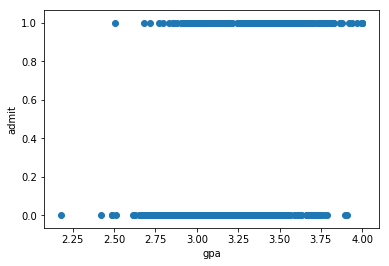

In [3]:
plt.scatter(admissions['gpa'],admissions['admit'])
plt.xlabel('gpa'), plt.ylabel('admit')
plt.show()

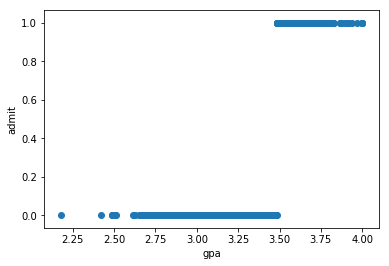

In [4]:
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
admissions['predicted_label'] = logistic_model.predict(admissions[["gpa"]])

plt.scatter(admissions[["gpa"]], admissions['predicted_label'])
plt.xlabel('gpa'), plt.ylabel('admit')
plt.show()

suggests a liner relation, since logistic regression is used to capture a linear relationship

<br>

### Error Metric: ROC_AUC

In [6]:
admissions = admissions.rename(columns={'admit': 'actual_label'})
roc_auc = roc_auc_score(admissions['actual_label'], admissions['predicted_label'])
print(f"Roc_Auc_score = {roc_auc:0.3f}")

Roc_Auc_score = 0.622


<br>

### Error Metric: Accuracy

In [7]:
matches = admissions['actual_label']==admissions['predicted_label']
correct_predictions = admissions[matches]

accuracy = len(correct_predictions)/len(admissions)
print("Accuracy = {:0.3f}".format(accuracy))

Accuracy = 0.685


<br>

### Error Metric: Sensitivity (True positice rate): $TPR = \frac{True\,Positives}{True\,Positives+False\,Negatives}$

In [8]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

false_negatives_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negatives_filter])

sensitivity = true_positives/(true_positives+false_negatives)
print("Sensitivity = {:0.3f}".format(sensitivity))

Sensitivity = 0.365


<br>

### Error Metric: Specificity (True Negative rate): $TNR = \frac{True\,Negatives}{False\,Positives+True\,Negatives}$

In [9]:
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])

specificity = true_negatives/(true_negatives+false_positives)
print("Specificity = {:0.3f}".format(specificity))

Specificity = 0.880
